In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau , ModelCheckpoint
from keras.applications.mobilenet import MobileNet ,preprocess_input

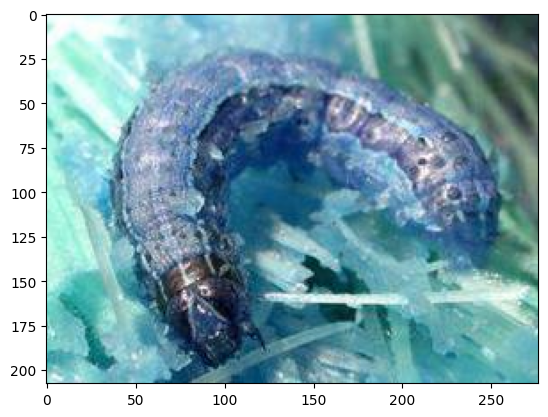

In [ ]:
img=cv2.imread('new_dataset/DATASET/army worm/16025.jpg')
plt.imshow(img)
plt.show()


In [ ]:
img=np.array(img)
img.shape

(208, 277, 3)

In [18]:
#!pip install plot-keras-history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9457 sha256=8c807f0bd4c23e3db037f94207a9f681c33bd58e539bf6b2d3452a09e07a9ff8
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320501 sha256=687f828a79b99c740a41ce5aa37d5d5cddfe258700d0d07cb19df0c77f4bde0c
  Stored in directory: /root/.cache/pip/wheels/b7/f3/5d/748143833c99806921d4e1182c248876b83464746ef1e46f1d
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

In [19]:
from plot_keras_history import show_history, plot_history
def p_m(history, epochs):
   num_epochs = epochs
   accuracy = history.history['accuracy']
   precision = history.history['precision']
   recall = history.history['recall']
   f1_score = history.history['auc']
   i = num_epochs-1
   performance_metrics = [accuracy[i], precision[i], recall[i], f1_score[i]]
   print(performance_metrics)
   plot_history(history, path="standard.png")
   return performance_metrics

In [ ]:
def g_r(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [ ]:
import os
import glob

data_dir = 'new_dataset/DATASET'  # directory containing all class directories

class_names = os.listdir(data_dir)  # list all class directories
class_image_counts = {}  # dictionary to store image counts for each class

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)  # path to class directory
    image_files = glob.glob(os.path.join(class_dir, '*.jpg'))  # list all image files in class directory
    class_image_counts[class_name] = len(image_files)  # store count in dictionary



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'new_dataset\DATASET'  # directory containing all class directories
max_images_per_class = 100  # maximum number of images to use per class
batch_size = 32  # batch size for training

# create image data generator with preprocessing options
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# create image data generator for validation set with only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# generate data from directory with fixed number of images per class
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training',
    # limit the number of images per class using the "classes" argument
    #classes=[class_name for class_name, count in class_image_counts.items() for i in range(count)]
    )

Found 13234 images belonging to 132 classes.


In [ ]:
# generate data from directory with fixed number of images per class
valid_generator = valid_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    seed=42,
    subset='validation',
    # limit the number of images per class using the "classes" argument
    #classes=[class_name for class_name, count in class_image_counts.items() for i in range(count)
    )

Found 0 images belonging to 132 classes.


In [4]:
path = 'new_dataset\DATASET'


training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(path,batch_size=16,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
    validation_split=0.05
).flow_from_directory(path,batch_size=16,target_size=(224,224),subset='validation',shuffle=False)

testing=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
).flow_from_directory(path,batch_size=16,target_size=(224,224),shuffle=False)


Found 12579 images belonging to 132 classes.
Found 655 images belonging to 132 classes.
Found 13234 images belonging to 132 classes.


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [6]:
def predictor(test_gen, test_steps, cmcmap,model):   
    y_pred= []
    error_list=[]
    error_pred_list = []
    y_true=test_gen.labels
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, verbose=1)
    tests=len(preds)    
    for i, p in enumerate(preds):        
        pred_index=np.argmax(p)         
        true_index=test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors=errors + 1
            file=test_gen.filenames[i]
            error_list.append(file)
            error_class=classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc=( 1-errors/tests) * 100
    msg=f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}'
    print(msg) 
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    if class_count <=140:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(24, 16))
        sns.heatmap(cm, annot=False, vmin=0, fmt='g', cmap=cmcmap, cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return errors, tests, error_list, error_pred_list, f1score

Resnet model

In [7]:
input_shape_res=(224,224,3)
test_steps=16

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Resnet

In [ ]:
#create the base pre-trained model
base_model=ResNet50(include_top=False, weights='imagenet')
base_model.trainable=False

In [ ]:
#Resnet Model 1 
#add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(132, activation='softmax')(x)

#create final model
model = Model(inputs=base_model.input, outputs=predictions)

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
num_classes=132

In [ ]:
model=Sequential([
    base_model,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(132,activation='softmax')
])

In [ ]:
# Define the ResNet model
def resnet(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, (3,3), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(64, (3,3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(128, (3,3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize the ResNet model
model2 = resnet(input_shape_res, 132)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])


In [ ]:
test_steps = 16
num_epochs =100
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]
#model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
#callback=[EarlyStop , Reduce_LR,model_check]

In [ ]:
resnet_history=model2.fit(training,validation_data=validing,epochs=num_epochs,batch_size=32,
                  steps_per_epoch=len(training) // 32,validation_steps=len(validing) // 32,
                  callbacks=callback, verbose=1)

Epoch 1/100
24/24 [==============================] - 120s 5s/step - loss: 5.0000 - accuracy: 0.0156 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5127 - val_loss: 4.8261 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4967 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 115s 5s/step - loss: 4.8905 - accuracy: 0.0495 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5513 - val_loss: 4.6272 - val_accuracy: 0.1250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6727 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - 115s 5s/step - loss: 4.8118 - accuracy: 0.0573 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5803 - val_loss: 4.5999 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6669 - lr: 0.0010
Epoch 4/100
24/24 [==============================] - 115s 5s/step - loss: 4.7607 - accuracy: 0.0573 - precision: 0.0000e+00 - recall: 0.0

[0.0677083358168602, 0.0, 0.0, 0.6666402816772461]


[0.0677083358168602, 0.0, 0.0, 0.6666402816772461]

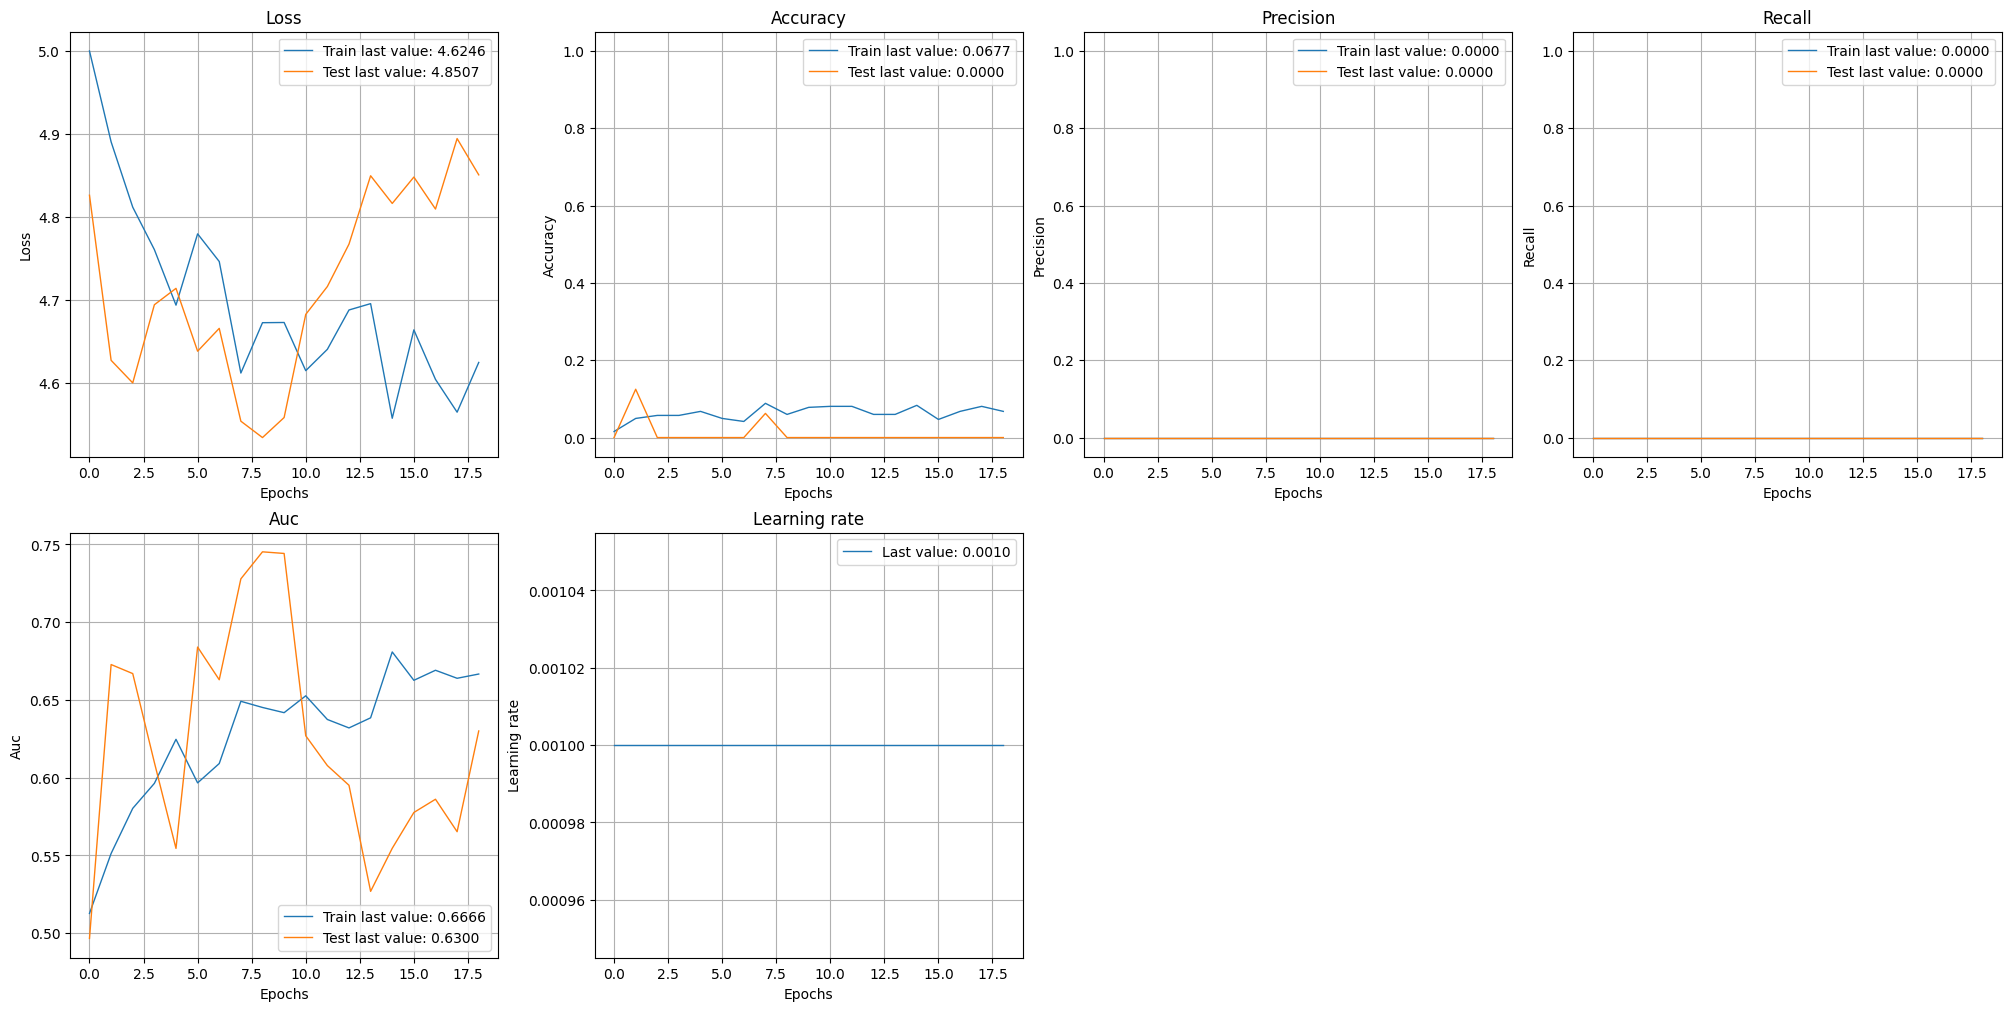

In [ ]:
p_m(resnet_history, 19)

In [ ]:
#errors, tests, error_list, error_pred_list, f1score =predictor(testing, test_steps,"Reds", model2)

# EfficientNet B7

In [9]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Model

In [10]:
base_model=tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, weights="imagenet",input_shape=(224,224,3), pooling='max')
        
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(132, activation='softmax')(x)
eff_model=Model(inputs=base_model.input, outputs=output)
eff_model.compile(Adamax(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', "Precision", "Recall", "AUC"]) 
eff_model.summary()

258076736/258076736 [==============================] - 8s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)   

In [ ]:
base_model=tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, weights="imagenet",input_shape=(224,224,3), pooling='max')
        
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(132, activation='softmax')(x)
eff_model=Model(inputs=base_model.input, outputs=output)
eff_model.compile(Adamax(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', "Precision", "Recall", "AUC"]) 
eff_model.summary()

In [12]:
eff_history=eff_model.fit(training,validation_data=validing,epochs=100,batch_size=16,
                  steps_per_epoch=len(training) // 16,validation_steps=len(validing) // 8, verbose=1)

Epoch 1/100
49/49 [==============================] - 16s 330ms/step - loss: 4.9930 - accuracy: 0.0651 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5376 - val_loss: 5.1756 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4737
Epoch 2/100
49/49 [==============================] - 17s 343ms/step - loss: 4.9742 - accuracy: 0.0574 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5346 - val_loss: 6.4359 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4968
Epoch 3/100
49/49 [==============================] - 16s 326ms/step - loss: 4.9052 - accuracy: 0.0625 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5438 - val_loss: 6.2083 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5019
Epoch 4/100
49/49 [==============================] - 16s 333ms/step - loss: 4.8717 - accuracy: 0.0612 - precision: 0.6000 - recall: 0.0038 - auc: 0.5510 - val_loss: 4

[0.0625, 0.0, 0.0, 0.5415989756584167]


[0.0625, 0.0, 0.0, 0.5415989756584167]

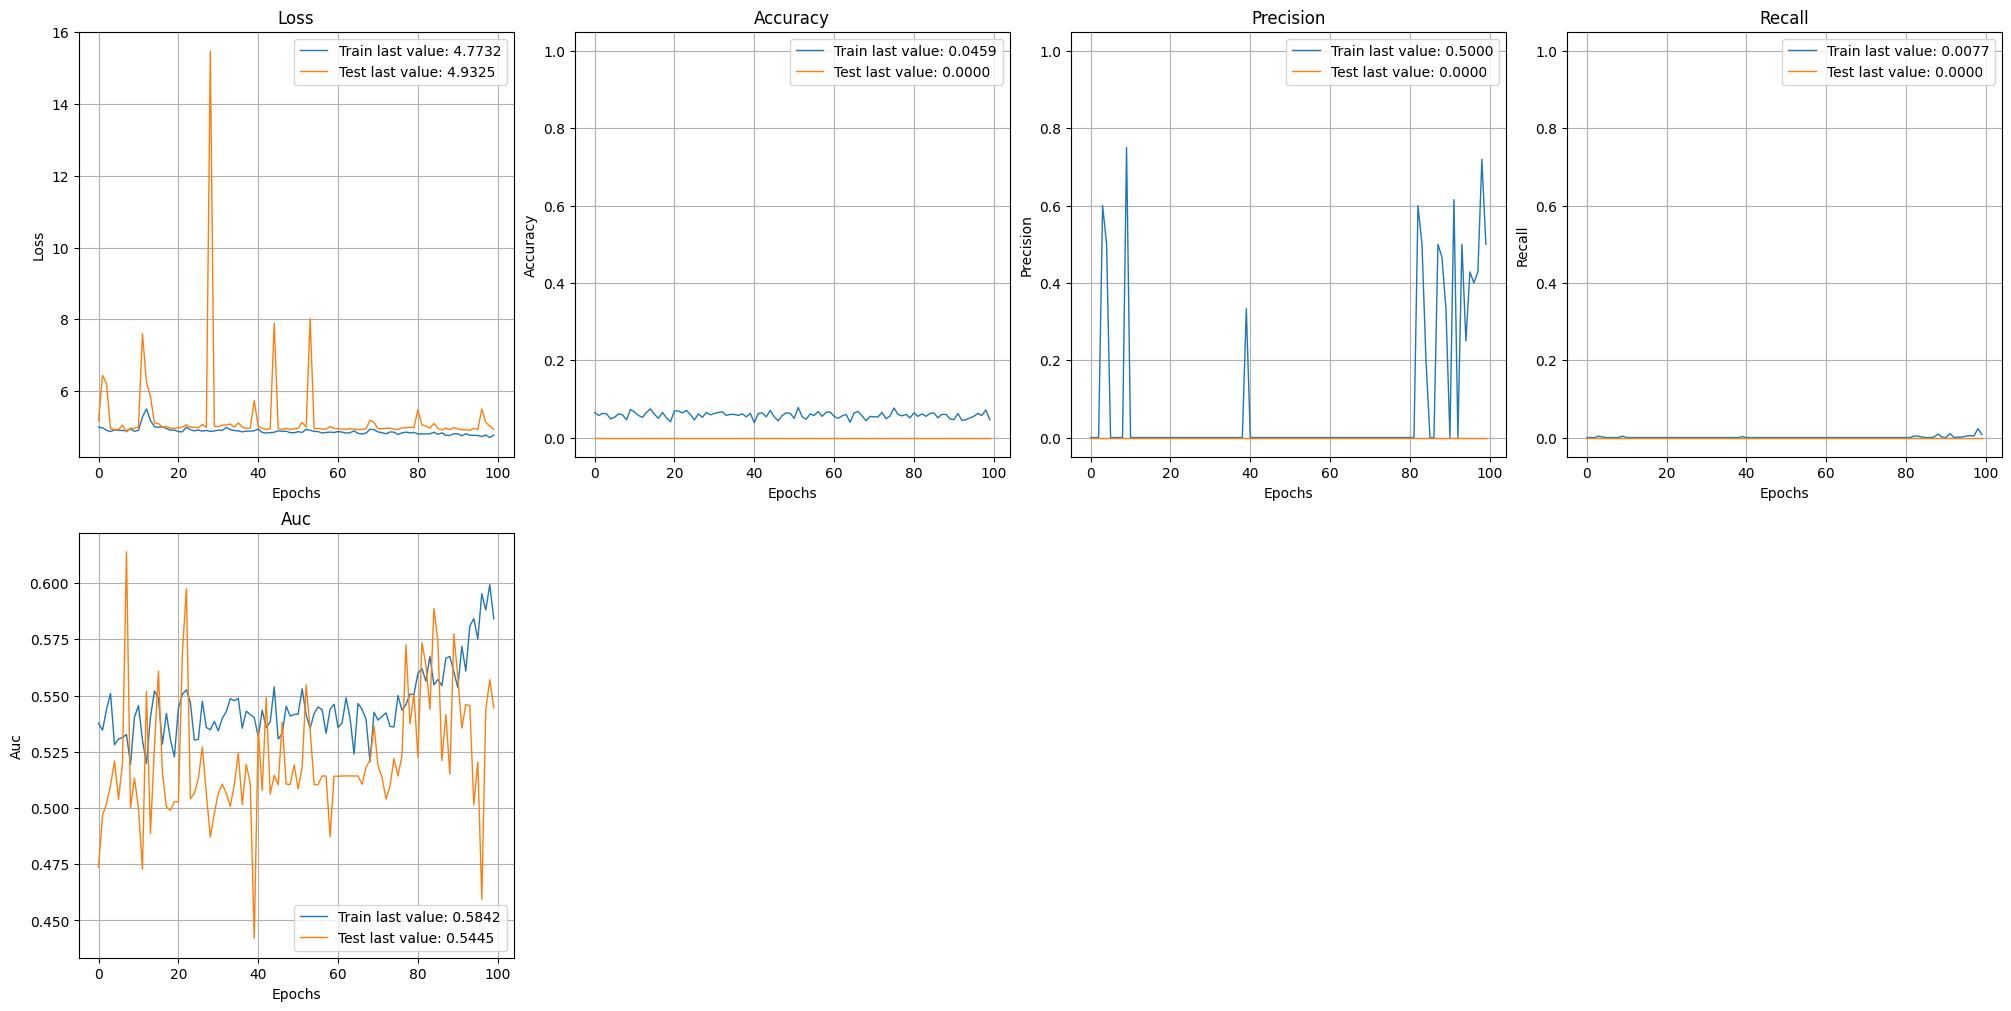

In [20]:
p_m(eff_history, 50)

# VGG16

In [ ]:
from tensorflow.keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.applications import VGG16

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg.trainable = False

In [ ]:
# Create the model
model = tf.keras.models.Sequential()

# Add the vgg base model
model.add(vgg)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(Dense(132, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', "Precision", "Recall", "AUC"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              25691136  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 132)              

In [ ]:
num_epochs = 100

In [ ]:
vgg_history=model.fit(training,validation_data=validing,epochs=num_epochs,batch_size=16,
                  steps_per_epoch=len(training) // 16,validation_steps=len(validing) // 8,
                  callbacks=callback, verbose=1)

Epoch 1/100
49/49 [==============================] - 82s 2s/step - loss: 0.1224 - accuracy: 0.0179 - precision: 0.0094 - recall: 0.0230 - auc: 0.5091 - val_loss: 0.0497 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4977 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 81s 2s/step - loss: 0.0527 - accuracy: 0.0268 - precision: 0.2000 - recall: 0.0089 - auc: 0.5467 - val_loss: 0.0449 - val_accuracy: 0.0125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5988 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 81s 2s/step - loss: 0.0485 - accuracy: 0.0497 - precision: 0.6154 - recall: 0.0204 - auc: 0.5728 - val_loss: 0.0460 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5898 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 80s 2s/step - loss: 0.0465 - accuracy: 0.0753 - precision: 0.7500 - recall: 0.0230 - auc: 0.5964 - val_loss: 0.

[0.2359693944454193, 0.7058823704719543, 0.12244898080825806, 0.8447319269180298]


[0.2359693944454193,
 0.7058823704719543,
 0.12244898080825806,
 0.8447319269180298]

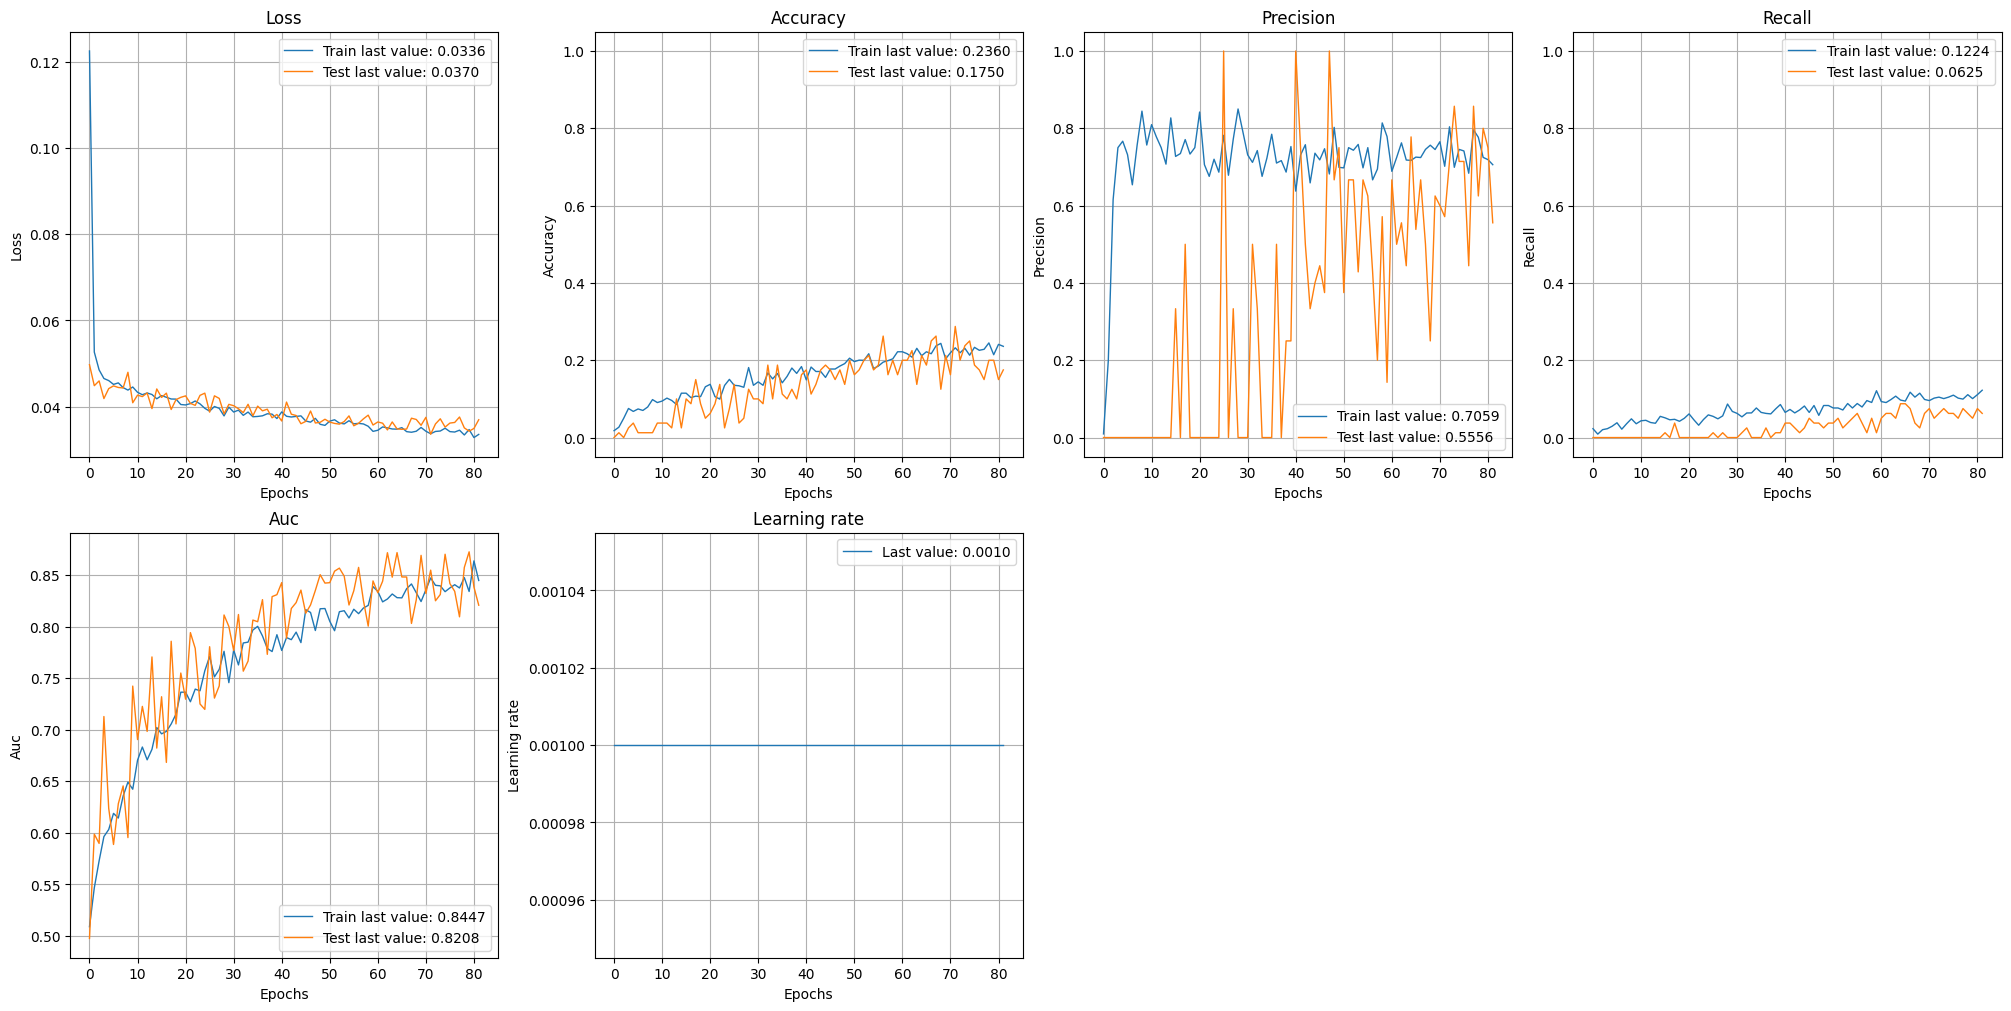

In [ ]:
p_m(vgg_history, 82)

In [ ]:
#errors, tests, error_list, error_pred_list, f1score =predictor(testing, test_steps,"Blues", model)

In [ ]:
tf.saved_model.save(model, "vgg_model1")
loaded_model = tf.saved_model.load("vgg_model1")

INFO:tensorflow:Assets written to: vgg_model\assets


INFO:tensorflow:Assets written to: vgg_model\assets


# MobileNet Model

In [ ]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))
mobilenet.trainable=False

In [ ]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_acc',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.99)

c:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    BatchNormalization(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(132,activation='softmax')
])

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.test.gpu_device_name())
print(tf.__version__)
print(tf.sysconfig.get_build_info())

[]

2.10.0
OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                        

In [ ]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy", "Precision", "Recall", "AUC"])

In [ ]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
epochs = 10
batch_size=32
steps_per_epoch = training.n // batch_size
validation_steps = validing.n // batch_size

In [ ]:
history_mob=model.fit(training,validation_data=validing,epochs=500,batch_size=batch_size,
                  steps_per_epoch=steps_per_epoch,validation_steps=validation_steps, verbose=1)

Epoch 1/500
393/393 [==============================] - 390s 990ms/step - loss: 0.4829 - accuracy: 0.8527 - precision: 0.8968 - recall: 0.8209 - auc: 0.9947 - val_loss: 2.9095 - val_accuracy: 0.5750 - val_precision: 0.6509 - val_recall: 0.5594 - val_auc: 0.8811
Epoch 2/500
393/393 [==============================] - 269s 684ms/step - loss: 0.4948 - accuracy: 0.8491 - precision: 0.8958 - recall: 0.8152 - auc: 0.9935 - val_loss: 3.0991 - val_accuracy: 0.5750 - val_precision: 0.6557 - val_recall: 0.5594 - val_auc: 0.8687
Epoch 3/500
393/393 [==============================] - 255s 648ms/step - loss: 0.4905 - accuracy: 0.8467 - precision: 0.8930 - recall: 0.8084 - auc: 0.9938 - val_loss: 2.8786 - val_accuracy: 0.5938 - val_precision: 0.6803 - val_recall: 0.5719 - val_auc: 0.8803
Epoch 4/500
393/393 [==============================] - 237s 602ms/step - loss: 0.4887 - accuracy: 0.8511 - precision: 0.8921 - recall: 0.8176 - auc: 0.9941 - val_loss: 2.8150 - val_accuracy: 0.5969 - val_precision: 0.

In [ ]:
epochs = 10
batch_size=32
steps_per_epoch = training.n // batch_size
validation_steps = validing.n // batch_size

In [ ]:
# Save the model as hdf file
model.save('mobilenet_final1.hdf5')

[0.9348207116127014, 0.9488143920898438, 0.9246215224266052, 0.9977816343307495]


[0.9348207116127014,
 0.9488143920898438,
 0.9246215224266052,
 0.9977816343307495]

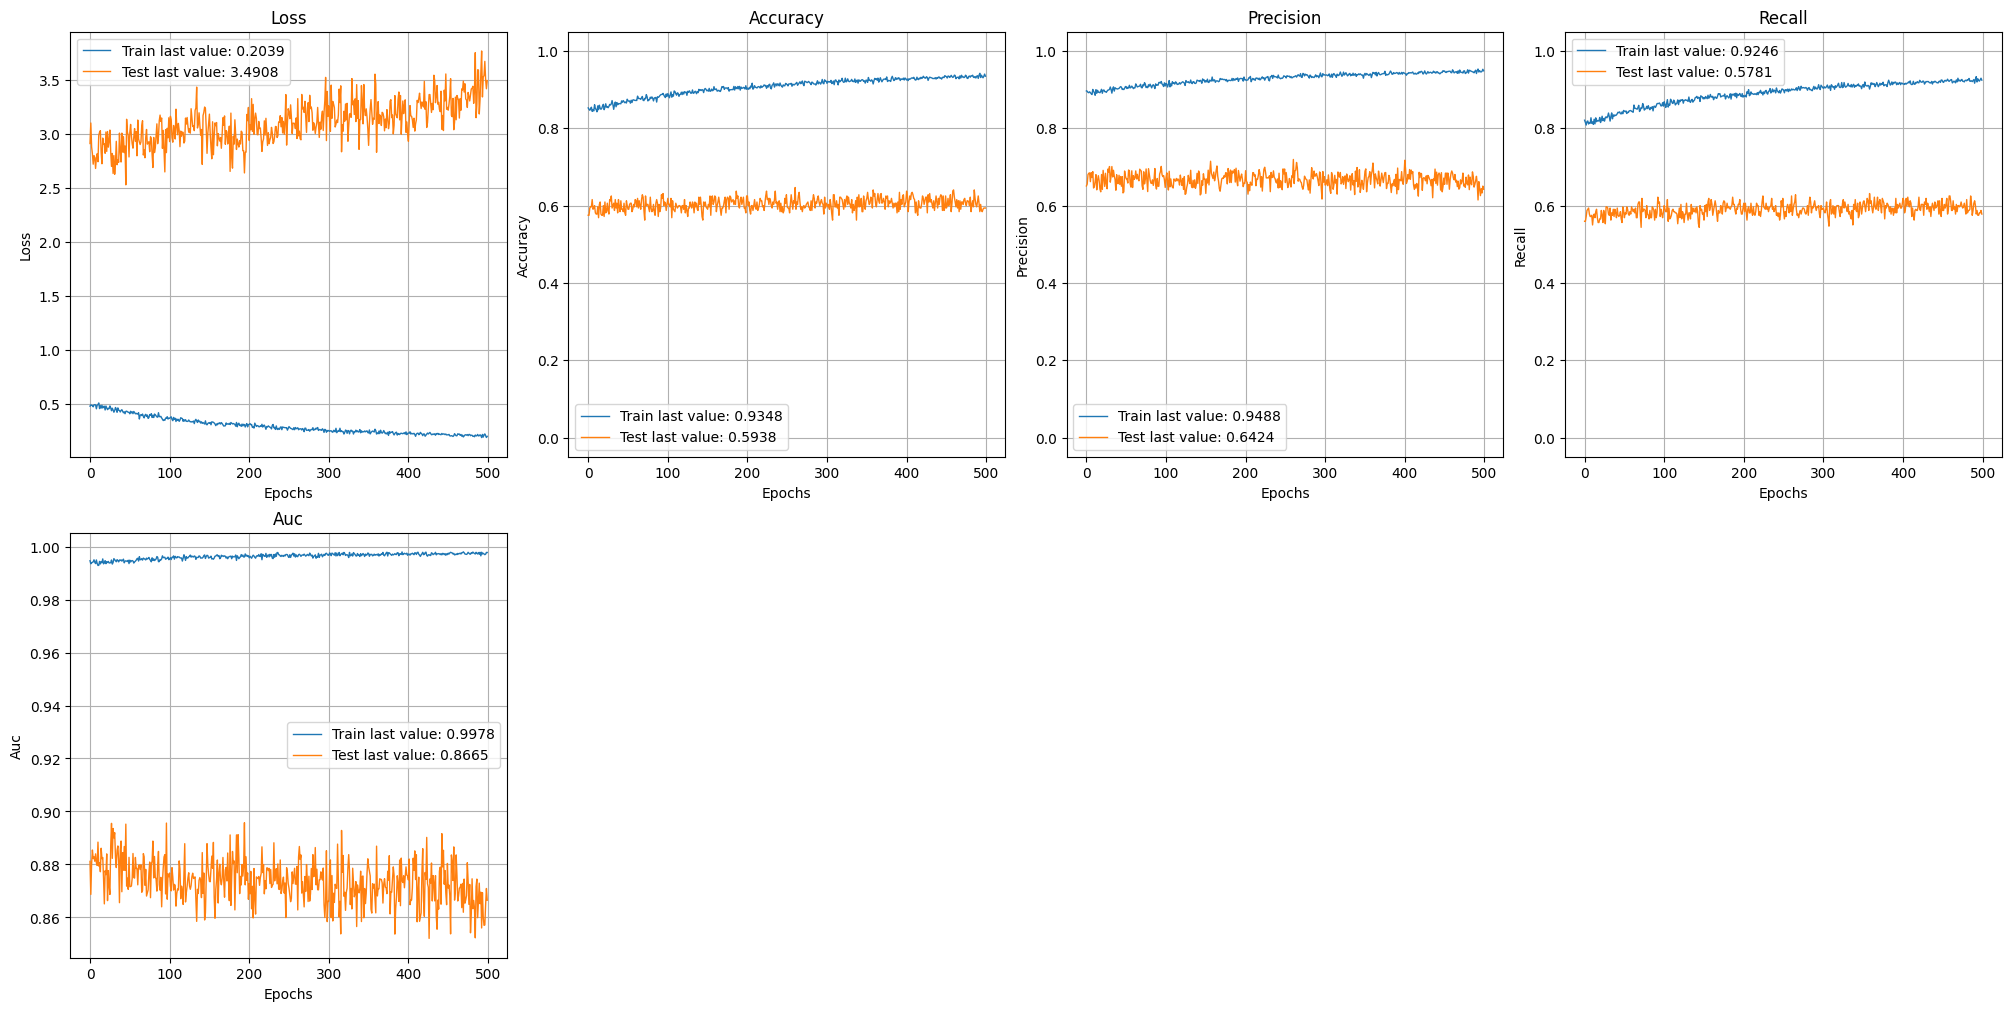

In [ ]:
p_m(history_mob,500)